## Machine Learning                              Assignment # 2
### MSDSF22M001                                               Maida Nadeem Butt
---

### Training Of The Pre-Processed Data Set....
#### Loading Pre-processed Dataset
---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("datasets/ML_Processed_Data.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,O,91.00,O,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,1,79.33,C,78.33,O,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,1,65.00,C,68.00,C,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,1,56.00,C,52.00,C,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,1,85.80,C,73.60,C,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


### Developing Model....
#### 1. Label Encoding
As, the dataset used here is categorical so firstly we need to transform it into numeric variables.

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder_gender = LabelEncoder()
label_encoder_ssc_board = LabelEncoder()
label_encoder_hsc_board = LabelEncoder()
label_encoder_hsc_subjects = LabelEncoder()
label_encoder_undergrad_degree = LabelEncoder()
label_encoder_work_experience = LabelEncoder()
label_encoder_specialisation = LabelEncoder()
label_encoder_status = LabelEncoder()

df['gender'] = label_encoder_gender.fit_transform(df['gender'])
df['ssc_board'] = label_encoder_ssc_board.fit_transform(df['ssc_board'])
df['hsc_board'] = label_encoder_hsc_board.fit_transform(df['hsc_board'])
df['hsc_subject'] = label_encoder_hsc_subjects.fit_transform(df['hsc_subject'])
df['undergrad_degree'] = label_encoder_undergrad_degree.fit_transform(df['undergrad_degree'])
df['work_experience'] = label_encoder_work_experience.fit_transform(df['work_experience'])
df['specialisation'] = label_encoder_specialisation.fit_transform(df['specialisation'])
df['status'] = label_encoder_status.fit_transform(df['status'])

In [4]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


#### 2. Class Balancing..
As we have many values of a class and few values of others, we balance them using OverSampling.

In [6]:
X = df.drop('status', axis = 1)
X = X.values
y = df['status']

print(X)
print(y)

[[ 1.   67.    1.   ... 55.    1.   58.8 ]
 [ 1.   79.33  0.   ... 86.5   0.   66.28]
 [ 1.   65.    0.   ... 75.    0.   57.8 ]
 ...
 [ 1.   67.    1.   ... 59.    0.   69.72]
 [ 0.   74.    1.   ... 70.    1.   60.23]
 [ 1.   62.    0.   ... 89.    1.   60.22]]
0      1
1      1
2      1
3      0
4      1
      ..
207    1
208    1
209    1
210    1
211    0
Name: status, Length: 212, dtype: int32


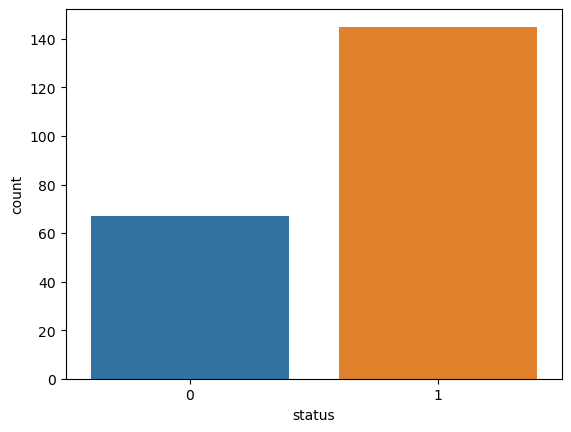

In [7]:
ax = sns.countplot(x=y)

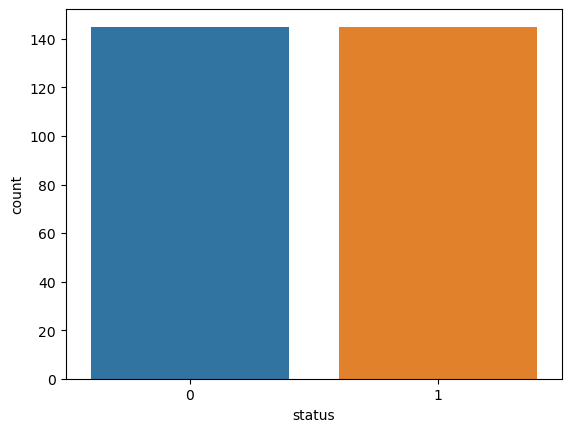

In [8]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

#### 3. Splitting the dataset for tarining and testing
Here we are splitting the dataset in the ratio of 75% train set and 25% test set.

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 4. Applying Model 
## 1. Naive Bayes..
Running a gaussian model to test our normal data

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
NB = MultinomialNB()
NB.fit(X_train, y_train)
nb_Accuracy = NB.score(X_test, y_test)
nb_pred = NB.predict(X_test)

# Calculate precision, recall, and F1 score
nb_precision = precision_score(y_test, nb_pred, pos_label=1)
nb_recall = recall_score(y_test, nb_pred, pos_label=1)
nb_f1 = f1_score(y_test, nb_pred, pos_label=1)

print("Acuuray: ",nb_Accuracy*100)
print('Precision:', nb_precision*100)
print('Recall:', nb_recall*100)
print('F1-score:', nb_f1*100)

Acuuray:  75.34246575342466
Precision: 71.7948717948718
Recall: 80.0
F1-score: 75.67567567567569


### Confusion Matrix of Naive Bayes Model

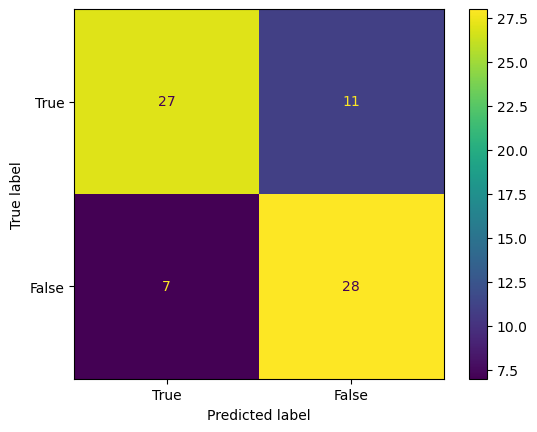

In [38]:
nb_confusion_matrix = confusion_matrix(y_test, nb_pred)
nb_cm_display = ConfusionMatrixDisplay(confusion_matrix = nb_confusion_matrix, display_labels = [True, False])
nb_cm_display.plot()

### Classification Report of Naive Bayes Model

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_pred, target_names=['True', 'False']))

              precision    recall  f1-score   support

        True       0.79      0.71      0.75        38
       False       0.72      0.80      0.76        35

    accuracy                           0.75        73
   macro avg       0.76      0.76      0.75        73
weighted avg       0.76      0.75      0.75        73



## 2. Logistic Regression..

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_Accuracy = logreg.score(X_test, y_test)
lg_pred = logreg.predict(X_test)


# Calculate precision, recall, and F1 score
lg_precision = precision_score(y_test, lg_pred, pos_label=1)
lg_recall = recall_score(y_test, lg_pred, pos_label=1)
lg_f1 = f1_score(y_test, lg_pred, pos_label=1)

print("Accuracy:",lg_Accuracy*100)
print('Precision:', lg_precision*100)
print('Recall:', lg_recall*100)
print('F1-score:', lg_f1*100)

Accuracy: 83.56164383561644
Precision: 79.48717948717949
Recall: 88.57142857142857
F1-score: 83.78378378378379


C:\Users\ASCC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix of Linea Regression Model

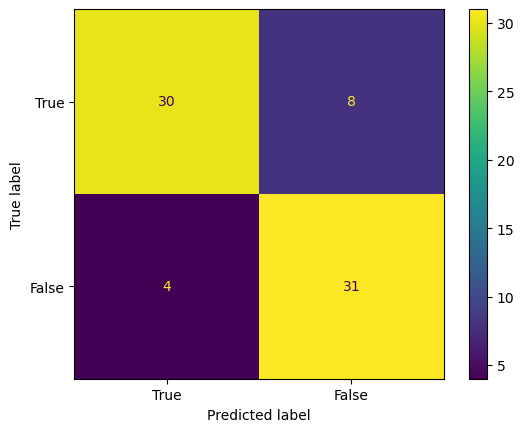

In [33]:
lg_confusion_matrix = confusion_matrix(y_test, lg_pred)
lg_cm_display = ConfusionMatrixDisplay(confusion_matrix = lg_confusion_matrix, display_labels = [True, False])
lg_cm_display.plot()

### Classification Report of Linear Regression Model

In [40]:
print(classification_report(y_test, lg_pred, target_names=['True', 'False']))

              precision    recall  f1-score   support

        True       0.88      0.79      0.83        38
       False       0.79      0.89      0.84        35

    accuracy                           0.84        73
   macro avg       0.84      0.84      0.84        73
weighted avg       0.84      0.84      0.84        73



## 3. XGBoost

In [28]:
import xgboost
xgb = xgboost.XGBClassifier()
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# Fit the model using the training data
xgb.fit(X_train, y_train)
xg_Accuracy = xgb.score(X_test, y_test)
xgb_pred = xgb.predict(X_test)

# Calculate precision, recall, and F1 score
xg_precision = precision_score(y_test, xgb_pred )
xg_recall = recall_score(y_test, xgb_pred )
xg_f1 = f1_score(y_test, xgb_pred )

print('Accuracy:', xg_Accuracy*100)
print('Precision:', xg_precision*100)
print('Recall:', xg_recall*100)
print('F1-score:', xg_f1*100)

Accuracy: 93.15068493150685
Precision: 96.875
Recall: 88.57142857142857
F1-score: 92.53731343283582


### Confusion Matrix of XGBoost

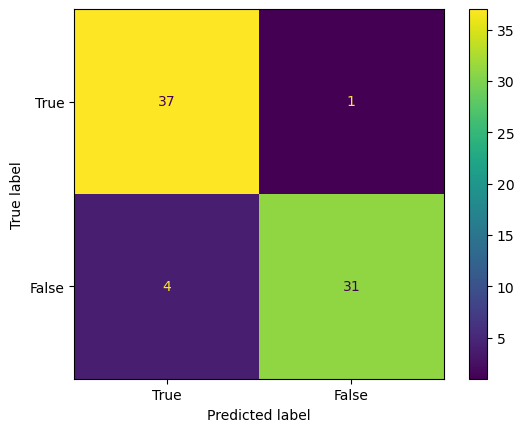

In [32]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb_pred)
xgb_cm_display = ConfusionMatrixDisplay(confusion_matrix = xgb_confusion_matrix, display_labels = [True, False])
xgb_cm_display.plot()

### Classification Report Of XGBoost

In [39]:
print(classification_report(y_test, xgb_pred, target_names=['True', 'False']))

              precision    recall  f1-score   support

        True       0.90      0.97      0.94        38
       False       0.97      0.89      0.93        35

    accuracy                           0.93        73
   macro avg       0.94      0.93      0.93        73
weighted avg       0.93      0.93      0.93        73



## Results

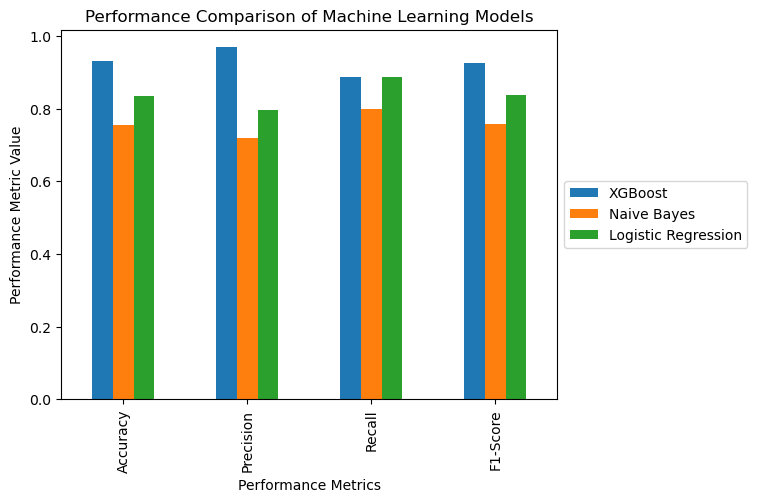

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
  
df = pd.DataFrame([['Accuracy',xg_Accuracy, nb_Accuracy, lg_Accuracy], 
                   ['Precision',xg_precision, nb_precision, lg_precision], 
                   ['Recall', xg_recall, nb_recall, lg_recall],
                   ['F1-Score', xg_f1, nb_f1, lg_f1]],
                  columns=['Models', "XGBoost",'Naive Bayes','Logistic Regression'])
  
df.plot(x='Models',
        kind='bar',
        stacked=False,
        title='Performance Comparison of Machine Learning Models',
         xlabel = 'Performance Metrics',
        ylabel = 'Performance Metric Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))